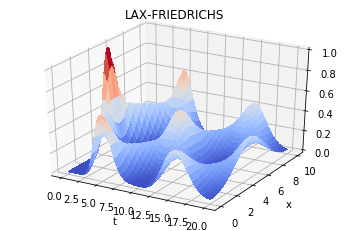

In [14]:
import pandas as pd
from numpy import exp
import numpy as np
import math 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
from numpy import linalg

#Inizializzo la griglia
x_up = 10
x_down = 0
c_f = 0.5
a = 1
T=20
Nx=101
dx = (x_up - x_down)/(Nx - 1)
dt = c_f *dx/a
Nt = math.ceil(T/dt) + 1
x = np.linspace(x_down, x_up, Nx)

#inizializzo il dato iniziale
x_0=5
v=1
u_0 = exp(-(x-x_0)**2)
derivatax= -2*(x-x_0)*exp(-(x-x_0)**2)
derivatay= 0


###Applico Lax-Friedrichs
#inizializzo la matrice della soluzione
U_laxf=np.zeros((Nx,Nt))
r_laxf=np.zeros((Nx,Nt))
s_laxf=np.zeros((Nx,Nt))

U_laxf[:,0]=exp(-(x-x_0)**2)
r_laxf[:,0]=v*(derivatax)
s_laxf[0,:]=0


for n in range (Nt -1):
    r_laxf[0,n+1]=0.5*(r_laxf[1,n]+r_laxf[Nx-1,n]) + v*dt/(2*dx)*(s_laxf[1,n]-s_laxf[Nx-1,n])
    r_laxf[1:(Nx-1),n+1]= 0.5*(r_laxf[2:Nx,n]+r_laxf[0:(Nx-2),n]) + v*dt/(2*dx)*(s_laxf[2:Nx,n]-s_laxf[0:(Nx-2),n])
    r_laxf[Nx-1,n+1]=0.5*(r_laxf[0,n]+r_laxf[Nx-2,n]) + v*dt/(2*dx)*(s_laxf[0,n]-s_laxf[Nx-2,n])
    
    s_laxf[0,n+1]=0.5*(s_laxf[1,n]+s_laxf[Nx-1,n]) + v*dt/(2*dx)*(r_laxf[1,n]-r_laxf[Nx-1,n])
    s_laxf[1:(Nx-1),n+1]= 0.5*(s_laxf[2:Nx,n]+s_laxf[0:(Nx-2),n]) + v*dt/(2*dx)*(r_laxf[2:Nx,n]-r_laxf[0:(Nx-2),n])
    s_laxf[Nx-1,n+1]=0.5*(s_laxf[0,n]+s_laxf[Nx-2,n]) + v*dt/(2*dx)*(r_laxf[0,n]-r_laxf[Nx-2,n])
    
    U_laxf[0,n+1] = U_laxf[0,n] + dt/2 * (s_laxf[0,n+1] + s_laxf[0,n])
    U_laxf[1:(Nx-1),n+1] = U_laxf[1:(Nx-1),n] + dt/2 * (s_laxf[1:(Nx-1),n+1] + s_laxf[1:(Nx-1),n])
    U_laxf[(Nx-1),n+1] = U_laxf[(Nx-1),n] + dt/2 * (s_laxf[(Nx-1),n+1] + s_laxf[(Nx-1),n])
    


####Grafico tridimensionalmente per avere un'idea ciara dell'evoluzione dell'onda

t=np.linspace(0,T,Nt)
X,Y= np.meshgrid(t,x)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, U_laxf, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title('LAX-FRIEDRICHS')
#plt.savefig('LAX-FRIEDRICHS1D.png')
plt.show()




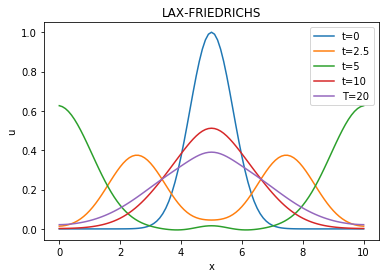

In [15]:

plt.plot(x,U_laxf[:,0],label='t=0')
#plt.plot(x,U_laxf[:,5],label='T=5')
plt.plot(x,U_laxf[:,50],label='t=2.5')
plt.plot(x,U_laxf[:,100],label='t=5')
plt.plot(x,U_laxf[:,200],label='t=10')
plt.plot(x,U_laxf[:,400],label='T=20')
plt.xlabel('x')
plt.ylabel('u')
plt.title('LAX-FRIEDRICHS')
plt.legend()
#plt.savefig('LAX-FRIEDRICHS1D_2D.png')

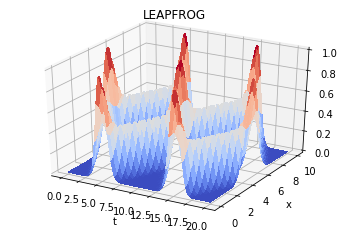

In [16]:

#####Applico Leapfrog
#inizializzo la matrice della soluzione
U_leapf=np.zeros((Nx,Nt))
r_leapf=np.zeros((Nx,Nt))
s_leapf=np.zeros((Nx,Nt))

U_leapf[:,0]=exp(-(x-x_0)**2)
r_leapf[:,0]=v*(derivatax)
s_leapf[0,:]=0

#mi serve il valore U n-1. Applico Lax_f per averlo.
n=0
r_leapf[0,n+1]=0.5*(r_leapf[1,n]+r_leapf[Nx-1,n]) + v*dt/(2*dx)*(s_leapf[1,n]-s_leapf[Nx-1,n])
r_leapf[1:(Nx-1),n+1]= 0.5*(r_leapf[2:Nx,n]+r_leapf[0:(Nx-2),n]) + v*dt/(2*dx)*(s_leapf[2:Nx,n]-s_leapf[0:(Nx-2),n])
r_leapf[Nx-1,n+1]=0.5*(r_leapf[0,n]+r_leapf[Nx-2,n]) + v*dt/(2*dx)*(s_leapf[0,n]-s_leapf[Nx-2,n])

s_leapf[0,n+1]=0.5*(s_leapf[1,n]+s_leapf[Nx-1,n]) + v*dt/(2*dx)*(r_leapf[1,n]-r_leapf[Nx-1,n])
s_leapf[1:(Nx-1),n+1]= 0.5*(s_leapf[2:Nx,n]+s_leapf[0:(Nx-2),n]) + v*dt/(2*dx)*(r_leapf[2:Nx,n]-r_leapf[0:(Nx-2),n])
s_leapf[Nx-1,n+1]=0.5*(s_leapf[0,n]+s_leapf[Nx-2,n]) + v*dt/(2*dx)*(r_leapf[0,n]-r_leapf[Nx-2,n])

U_leapf[0,n+1] = U_leapf[0,n] + dt/2 * (s_leapf[0,n+1] + s_leapf[0,n])
U_leapf[1:(Nx-1),n+1] = U_leapf[1:(Nx-1),n] + dt/2 * (s_leapf[1:(Nx-1),n+1] + s_leapf[1:(Nx-1),n])
U_leapf[(Nx-1),n+1] = U_leapf[(Nx-1),n] + dt/2 * (s_leapf[(Nx-1),n+1] + s_leapf[(Nx-1),n])

for n in range (1,Nt-1):
    U_leapf[0,n+1]=(v**2 * dt**2 / dx**2)*U_leapf[1,n] + 2*U_leapf[0,n]*(1-v**2 *dt**2 / dx**2) + (v**2 *dt**2 / dx**2) *U_leapf[Nx-1,n] - U_leapf[0,n-1]
    U_leapf[1:(Nx-1),n+1]=(v**2 * dt**2 / dx**2)*U_leapf[2:Nx,n] + 2*U_leapf[1:(Nx-1),n]*(1-v**2 *dt**2 / dx**2) + (v**2 *dt**2 / dx**2) *U_leapf[0:(Nx-2),n] - U_leapf[1:(Nx-1),n-1]
    U_leapf[Nx-1,n+1]= (v**2 * dt**2 / dx**2)*U_leapf[0,n] + 2*U_leapf[Nx-1,n]*(1-v**2 *dt**2 / dx**2) + (v**2 *dt**2 / dx**2) *U_leapf[Nx-2,n] - U_leapf[Nx-1,n-1]

    
####Grafico tridimensionalmente per avere un'idea chiara dell'evoluzione dell'onda

t=np.linspace(0,T,Nt)
X,Y= np.meshgrid(t,x)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, U_leapf, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title('LEAPFROG')
#plt.savefig('LEAPFROG1D.png')
plt.show()

Text(0.5, 1.0, 'LEAPFROG')

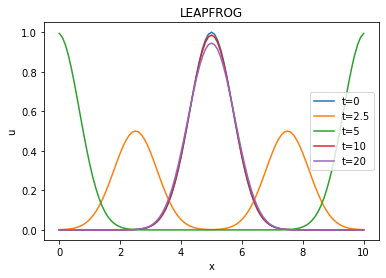

In [17]:

plt.plot(x,U_leapf[:,0],label='t=0')
plt.plot(x,U_leapf[:,50],label='t=2.5')
plt.plot(x,U_leapf[:,100],label='t=5')
plt.plot(x,U_leapf[:,200],label='t=10')
plt.plot(x,U_leapf[:,400],label='t=20')
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('LEAPFROG')
#plt.savefig('LEAPFROG1D_2D.png')


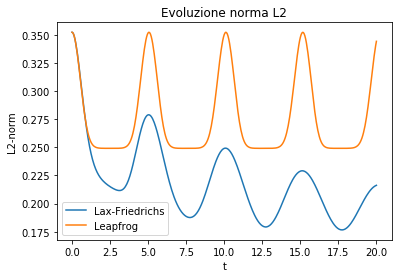

In [18]:
#####Analizzo l'evoluzione della norma L2

from scipy import integrate

norma_leapf = np.zeros(Nt)
norma_laxf = np.zeros(Nt)

for n in range (Nt):
    norma_laxf[n]=np.sqrt(1/Nx*np.sum(U_laxf[:,n]**2))
    norma_leapf[n]=np.sqrt(1/Nx*np.sum(U_leapf[:,n]**2))
    


plt.plot(t,norma_laxf,label='Lax-Friedrichs')
plt.plot(t,norma_leapf, label = 'Leapfrog')
plt.title('Evoluzione norma L2')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.legend()
#plt.savefig('L2-norm_1D.png')

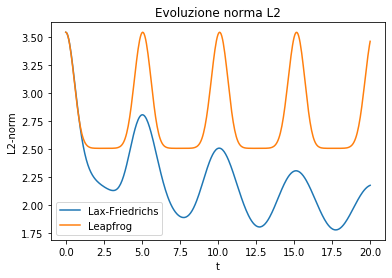

In [22]:
norma1 = np.zeros(Nt)
norma2 = np.zeros(Nt)

for i in range (Nt):
    norma1[i] = linalg.norm(U_laxf[:,i])
    norma2[i] = linalg.norm(U_leapf[:,i])

    
plt.plot(t,norma1,label='Lax-Friedrichs')
plt.plot(t,norma2, label = 'Leapfrog')
plt.title('Evoluzione norma L2')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.legend()
plt.savefig('L2-norm_1D_linalg.png')

In [28]:
for i in range (Nt):
    plt.plot(x,U_laxf[:,i],label='Lax-Friedrichs')
    plt.plot(x,U_leapf[:,i],label='Leapfrog')
    plt.legend(loc = 'lower right')
    plt.ylim(0,1.05)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('t = '+ str(i*20/401) + 's')
    plt.savefig('_'+str(i)+'_.png')
    plt.close()

In [24]:
print(Nt)

401
